In [1]:
import networkx as nx
from networkx.algorithms import approximation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
G = nx.Graph()
G.add_edge('a', 'b')
G.add_edge('a', 'e')
G.add_edge('a', 'h')
G.add_edge('b', 'c')
G.add_edge('b', 'g')
G.add_edge('c', 'd')
G.add_edge('c', 'f')
G.add_edge('d', 'e')
G.add_edge('d', 'h')
G.add_edge('e', 'f')
G.add_edge('f', 'g')
G.add_edge('g', 'h')

In [19]:
pd.DataFrame(nx.floyd_warshall_numpy(G), columns=G.nodes, index=G.nodes, dtype=int)

,a,b,e,h,c,g,d,f
a,0,1,1,1,2,2,2,2
b,1,0,2,2,1,1,2,2
e,1,2,0,2,2,2,1,1
h,1,2,2,0,2,1,1,2
c,2,1,2,2,0,2,1,1
g,2,1,2,1,2,0,2,1
d,2,2,1,1,1,2,0,2
f,2,2,1,2,1,1,2,0


In [4]:
nx.eccentricity(G)

{'a': 2, 'b': 2, 'e': 2, 'h': 2, 'c': 2, 'g': 2, 'd': 2, 'f': 2}

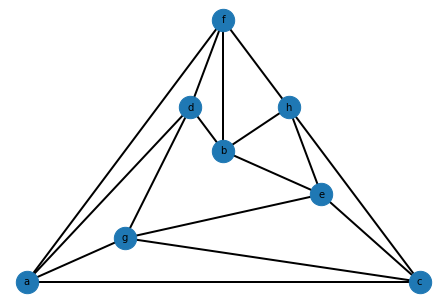

In [22]:
nx.draw(nx.complement(G), nx.planar_layout(nx.complement(G)), with_labels=True, node_size=500, font_size = 10, font_color='black', width=2)
plt.savefig('b.png')

In [20]:
pd.DataFrame(nx.floyd_warshall_numpy(nx.complement(G)), columns=nx.complement(G).nodes, index=nx.complement(G).nodes, dtype=int)

,a,b,e,h,c,g,d,f
a,0,2,2,2,1,1,1,1
b,2,0,1,1,2,2,1,1
e,2,1,0,1,1,1,2,2
h,2,1,1,0,1,2,2,1
c,1,2,1,1,0,1,2,2
g,1,2,1,2,1,0,1,2
d,1,1,2,2,2,1,0,1
f,1,1,2,1,2,2,1,0


In [7]:
N = nx.Graph()
N.add_edge('a', 'b')
N.add_edge('a', 'c')
N.add_edge('a', 'f')
N.add_edge('b', 'f')
N.add_edge('b', 'c')
N.add_edge('b', 'e')
N.add_edge('c', 'f')
N.add_edge('c', 'e')
N.add_edge('c', 'd')
N.add_edge('d', 'e')
N.add_edge('e', 'f')

In [8]:
for i in nx.algorithms.connectivity.edge_kcomponents.bridge_components(N):
    print(i)

{'a', 'c', 'e', 'b', 'f', 'd'}


In [9]:
for block in nx.algorithms.components.biconnected_component_edges(N):
    print(block)

[('a', 'b'), ('b', 'f'), ('f', 'a'), ('f', 'c'), ('c', 'a'), ('c', 'b'), ('c', 'e'), ('e', 'b'), ('e', 'd'), ('d', 'c'), ('e', 'f')]


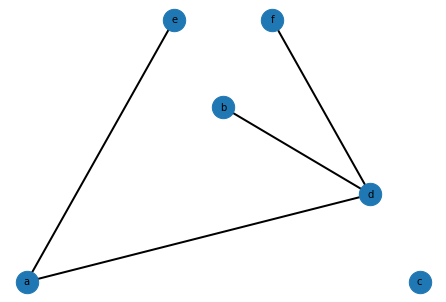

In [21]:
nx.draw(nx.complement(N), nx.planar_layout(nx.complement(N)), with_labels=True, node_size=500, font_size = 10, font_color='black', width=2)
plt.savefig('a.png')

In [12]:
for i in nx.algorithms.connectivity.edge_kcomponents.bridge_components(nx.complement(N)):
    print(i)

{'a'}
{'b'}
{'c'}
{'f'}
{'e'}
{'d'}


In [13]:
for block in nx.algorithms.components.biconnected_component_edges(nx.complement(N)):
    print(block)

[('a', 'e')]
[('d', 'b')]
[('d', 'f')]
[('a', 'd')]


In [15]:
for point in nx.algorithms.components.articulation_points(nx.complement(N)):
    print(point)

d
a


In [17]:
for bridge in nx.bridges(nx.complement(N)):
    print(bridge)

('a', 'e')
('a', 'd')
('b', 'd')
('f', 'd')
